# Introduction

In this notebook we analyze the results of the "Importance of start weights" experiment.

In this experiment we initialized the same CNN architecture with different random start weights and
trained each model for 50 epochs on the "Imagenette2" dataset.

There are two interesting main research questions which we try to answer with this experiment:
1. How do the accuracy curves on the training and testing set differ during training after each epoch?
2. Is the final accuracy that we achieved similar?

# Plot the accuracies

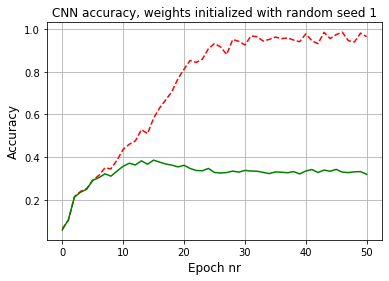

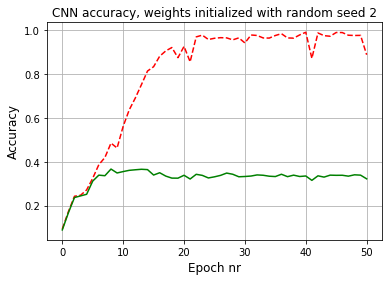

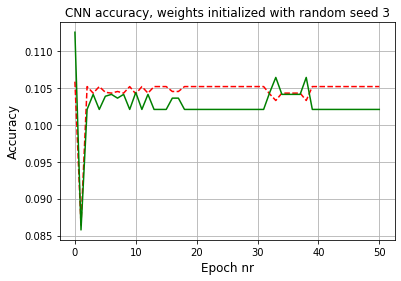

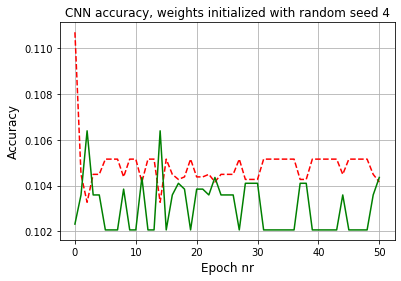

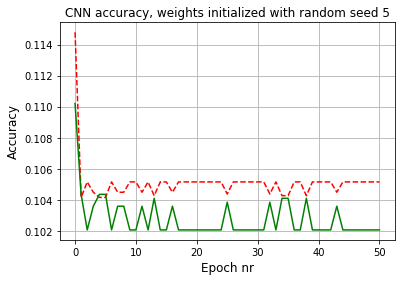

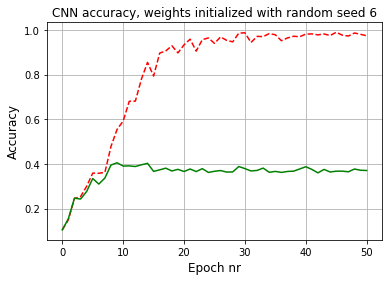

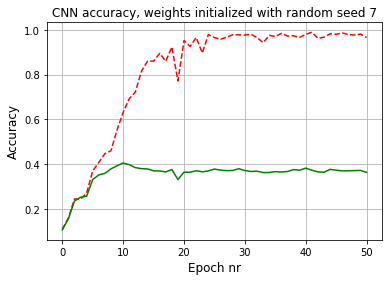

nr_working_models: 4
nr_not_working_models: 3


In [1]:
import matplotlib.pyplot as plt
import pickle

nr_working_models = 0
nr_not_working_models = 0
accs_working_models = []
for seed_value in range(1,8):
    #fname = "results_seed01_to_26/saved_model_histories/model_seed{0:0>3}.history".format(seed_value)
    fname = "saved_model_histories_imagewoof_dlserver/model_seed{0:0>3}.history".format(seed_value)

    fobj = open(fname, "rb")
    history = pickle.load(fobj)
    fobj.close()

    plt.plot(history["cl_rate_train"], color="red", linestyle="--")
    plt.plot(history["cl_rate_test"], color="green", linestyle="-")
    plt.xlabel("Epoch nr", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("CNN accuracy, weights initialized with random seed {0}".format(seed_value))
    plt.grid()
    plt.show()
    
    final_test_accuracy = history["cl_rate_test"][-1]
    
    if final_test_accuracy>0.15:
        nr_working_models += 1
        accs_working_models.append( final_test_accuracy )
    else:
        nr_not_working_models += 1
        
print("nr_working_models: {0}".format(nr_working_models))
print("nr_not_working_models: {0}".format(nr_not_working_models))

In [3]:
history

{'cl_rate_train': [0.10925207756232687,
  0.15844875346260387,
  0.2443213296398892,
  0.24310249307479223,
  0.27080332409972296,
  0.3694182825484765,
  0.40753462603878116,
  0.447202216066482,
  0.4598337950138504,
  0.5532409972299169,
  0.6314681440443213,
  0.6925207756232687,
  0.7224376731301939,
  0.8155124653739613,
  0.8603878116343491,
  0.8606094182825484,
  0.8954016620498615,
  0.8598337950138504,
  0.9233240997229917,
  0.7721883656509695,
  0.952797783933518,
  0.9258725761772854,
  0.9663157894736842,
  0.8966204986149584,
  0.9797229916897507,
  0.9654293628808864,
  0.958781163434903,
  0.967202216066482,
  0.978393351800554,
  0.9780609418282549,
  0.9770637119113573,
  0.9809418282548477,
  0.9656509695290859,
  0.9429362880886426,
  0.9757340720221607,
  0.9704155124653739,
  0.9844875346260388,
  0.9727423822714681,
  0.9735180055401662,
  0.9665373961218836,
  0.9803878116343491,
  0.989584487534626,
  0.9622160664819944,
  0.9676454293628809,
  0.982936288088

# Are the final accuracies similar?

In [4]:
accs_working_models

[0.3191651819801476,
 0.32196487655892086,
 0.37032323746500384,
 0.3626877067956223]

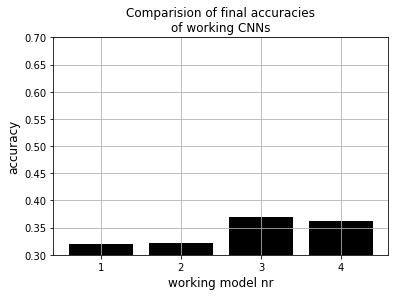

In [6]:
import numpy as np
xvalues = np.arange(1,len(accs_working_models)+1)

plt.bar(xvalues, accs_working_models, color="black")
plt.xticks(xvalues)
plt.ylim(0.3,0.7)
plt.xlabel("working model nr", fontsize=12)
plt.ylabel("accuracy", fontsize=12)
plt.grid()
plt.title("Comparision of final accuracies\nof working CNNs")
plt.show()

In [7]:
minacc = min(accs_working_models)
minacc

0.3191651819801476

In [8]:
maxacc = max(accs_working_models)
maxacc

0.37032323746500384

In [9]:
acc_range = maxacc-minacc
acc_range

0.051158055484856246